In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('extended_table.csv')
df = df.dropna()
df.head()

,SUBS_ID,DATE_CALC,TARIFF_ID,CHARGE,SUPPORT_4G,SUPPORT_3G,LTE_TRAFF_FLAG,SMS_IN_CNT,SMS_OUT_CNT,CALLS_IN_CNT,CALLS_OUT_CNT,LIFE_TIME,DURATION_IN_MIN,DURATION_OUT_MIN,DATA_TRAFFIC_MB,SESSIONS_CNT,RECHARGE,RECHARGE_CNT,Выборка,tariff_changes_count
0,1245,2019-07-01,588.0,206.1,0,0,0.0,119,11,400,193,5213.0,448,237.15,16.79,838,250.0,2,1,0
1,1245,2019-08-01,588.0,378.9,0,0,0.0,125,13,332,215,5244.0,441,374.88,12.22,731,650.0,3,1,0
2,1245,2019-09-01,588.0,328.9,0,0,0.0,75,15,320,221,5274.0,444,300.65,12.43,768,0.0,0,1,0
3,1261,2019-07-01,524.0,318.6,0,1,0.0,210,39,109,60,5213.0,431,212.50,1626.61,1608,340.0,4,1,0
4,1261,2019-08-01,524.0,262.3,0,1,0.0,309,24,72,122,5244.0,225,237.78,3591.44,1601,150.0,1,1,0


In [3]:
df.columns[3:-2]

Index(['CHARGE', 'SUPPORT_4G', 'SUPPORT_3G', 'LTE_TRAFF_FLAG', 'SMS_IN_CNT',
       'SMS_OUT_CNT', 'CALLS_IN_CNT', 'CALLS_OUT_CNT', 'LIFE_TIME',
       'DURATION_IN_MIN', 'DURATION_OUT_MIN', 'DATA_TRAFFIC_MB',
       'SESSIONS_CNT', 'RECHARGE', 'RECHARGE_CNT'],
      dtype='object')

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
scores = cross_val_score(model, df[df.columns[3:-2]].values, df['tariff_changes_count'].values, cv=10)

/home/mark/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mark/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/mark/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mark/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/mark/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

In [5]:
np.mean(scores)

0.9650080127318027

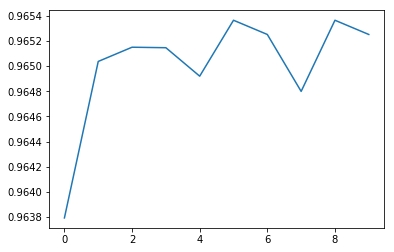

In [6]:
plt.plot(scores)

0.9364438753765189
0.963548128588225
0.9609904485285267
0.9649174548143293
0.9644761067927753
0.965189076059592
0.9651438131100365
0.9652343402904038
0.9652117068941765
0.9652456525058598
0.9652569711249882
0.9652456525058598
0.9652343377287609
0.9652569672829587
0.9652569672829587
0.9652569672829587
0.9652456525058598
0.9652569672829587
0.9652569672829587


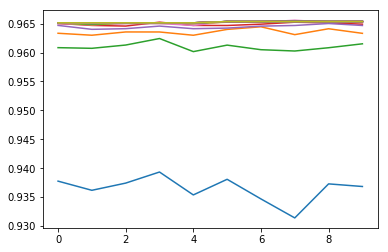

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, df[df.columns[3:-2]].values, df['tariff_changes_count'].values, cv=10)
    print(np.mean(scores))
    plt.plot(scores)